In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('TATA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 119.3+ KB


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
df1=df['Close']

In [9]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [10]:
df1=df1.iloc[::-1].reset_index()
df1.head()

,index,Close
0,2034,121.55
1,2033,120.90
2,2032,120.65
3,2031,117.60
4,2030,118.65


In [11]:
df1.drop('index',axis=1,inplace=True)

In [12]:
df1.head()

,Close
0,121.55
1,120.90
2,120.65
3,117.60
4,118.65


In [13]:
df1.shape

(2035, 1)

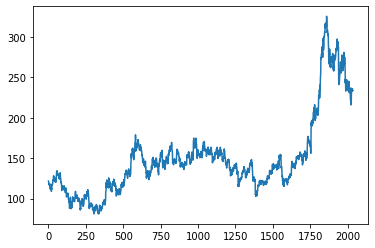

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
# LSTM are sensitive to the scale of the data. So we apply MinMax Scaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) # converting all values in the range of 0 to 1
df1= scaler.fit_transform(np.array(df1).reshape(-1,1)) #.reshape(-1,1) means converting all values in 1D array

In [17]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [18]:
df1.shape

(2035, 1)

In [19]:
# Splitting Data into train test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size


In [20]:
training_size,test_size

(1322, 713)

In [21]:
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [22]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):  # time_step=based on how many previous values will you predict data
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)     
    

In [31]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)


In [32]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [33]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [34]:
X_test,y_test = create_dataset(test_data,time_step)
X_test

array([[0.19219771, 0.19281046, 0.21058007, ..., 0.15482026, 0.15420752,
        0.15012255],
       [0.19281046, 0.21058007, 0.19526144, ..., 0.15420752, 0.15012255,
        0.15747549],
       [0.21058007, 0.19526144, 0.20404412, ..., 0.15012255, 0.15747549,
        0.15277778],
       ...,
       [0.86519608, 0.84027778, 0.84497549, ..., 0.62888072, 0.62765523,
        0.62234477],
       [0.84027778, 0.84497549, 0.87111928, ..., 0.62765523, 0.62234477,
        0.63378268],
       [0.84497549, 0.87111928, 0.85273693, ..., 0.62234477, 0.63378268,
        0.62622549]])

In [35]:
X_test.shape

(612, 100)

In [36]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# for LSTM we need 3 dimensions i.e. we have to add one more dimension
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # we will be giving time steps and features in the LSTM model
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Preprocessing done

In [37]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'